In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt

In [3]:
pop1 = pd.read_csv('Catalogues/NGC2539_10_Pop1.csv')
pop1

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,BPmag-RPmag,min,max,std,avg,mode,median,Q1,Q3,excl
0,122.870246,-13.115351,5726696228969656960,0.0160,0.0158,0.7442,0.0220,2.387,-2.340,0.023,...,0.660225,0.703984,0.712689,2.324708e-04,0.712621,0.70,0.712689,0.712634,0.712689,0.0
1,122.592026,-13.175190,5726703685031241344,0.0168,0.0133,0.7686,0.0233,2.418,-2.344,0.024,...,0.794511,0.714661,0.715452,9.035237e-05,0.715372,0.70,0.715400,0.715343,0.715432,0.0
2,122.493529,-13.148443,5726704887622111616,0.0896,0.0668,0.7800,0.1380,2.240,-2.209,0.137,...,1.727104,0.707517,0.707517,1.110223e-16,0.707517,0.70,0.707517,0.707517,0.707517,0.0
3,122.744525,-13.168882,5726705914117480192,0.0642,0.0571,0.8053,0.0870,2.277,-2.204,0.087,...,1.435174,0.717869,0.718019,9.870629e-06,0.718017,0.70,0.718019,0.718019,0.718019,0.0
4,122.747948,-13.173531,5726705918414183296,0.0101,0.0088,0.7507,0.0137,2.451,-2.403,0.013,...,0.527700,0.707522,0.710660,2.835633e-04,0.710499,0.70,0.710628,0.710442,0.710660,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,122.502167,-12.530298,5727514128182472192,0.0160,0.0115,0.7656,0.0231,2.337,-2.266,0.024,...,0.752796,0.724597,0.725850,9.426963e-05,0.725799,0.72,0.725833,0.725788,0.725850,0.0
373,122.688186,-12.579845,5727514884096631808,0.0284,0.0257,0.7175,0.0401,2.376,-2.319,0.042,...,0.975448,0.832461,0.833736,1.017559e-04,0.833677,0.82,0.833712,0.833661,0.833736,0.0
374,122.725028,-12.578360,5727515021536229760,0.0375,0.0359,0.7076,0.0567,2.403,-2.330,0.062,...,1.084478,0.822287,0.824145,2.610980e-04,0.823940,0.82,0.824020,0.823879,0.824100,0.0
375,122.706782,-12.538114,5727516086687451264,0.0215,0.0191,0.7722,0.0284,2.464,-2.412,0.030,...,0.901432,0.778142,0.779205,9.951219e-05,0.779166,0.76,0.779205,0.779164,0.779205,0.0


## Plotting the CMD

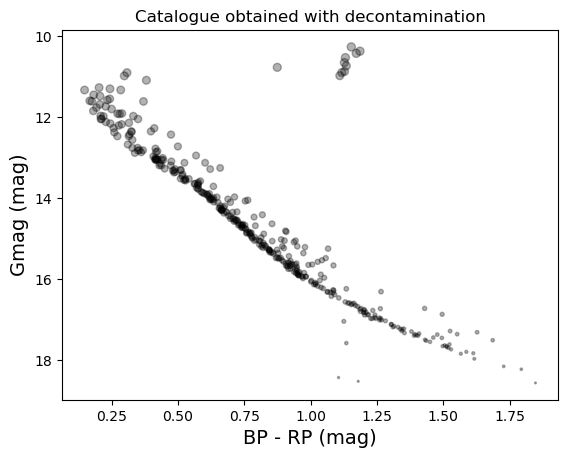

In [4]:
fig,ax = plt.subplots(sharex=True,sharey=True)

ax.set_title('Catalogue obtained with decontamination')
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.set_xlabel('BP - RP (mag)',fontsize=14)
ax.set_ylabel('Gmag (mag)',fontsize=14)
ax.invert_yaxis()


### Adjusting the isochrones

In [5]:
#reading the table of isochrones
iso = ascii.read("Catalogues/isochrones.csv")

In [6]:
kk, = np.where(iso["logAge"] == 8.75001)  #binaries
jj, = np.where(iso["logAge"] == 8.80001)
ll, = np.where(iso["logAge"] == 8.85001)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [7]:
EBV = 0.08
AV = 3.1 * EBV

# Modulo da distancia em Mpc tirado de CG+2020
Md = 10.6

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

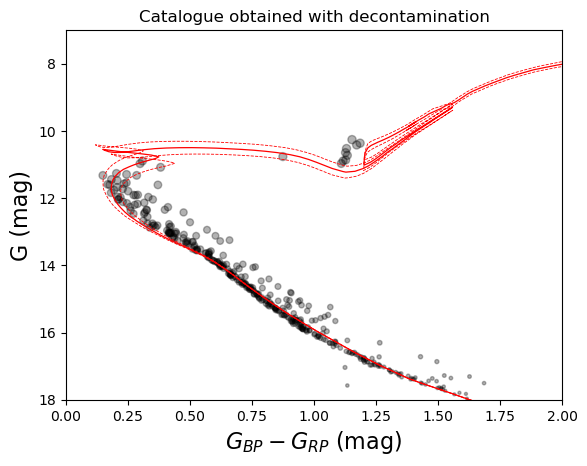

In [10]:
fig, ax = plt.subplots()
ax.set_title("Catalogue obtained with decontamination")
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 2.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)